<a href="https://colab.research.google.com/github/Shakib-IO/Python/blob/master/EllisDon_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 01
As a data scientist working for a construction company, you are tasked with **developing a machine learning solution to predict the risk factors of the project at the right time** so that business can take precautionary measures to minimize the impact.


You have been provided with a dataset containing information about the construction projects thecompany has undertaken in the past. The dataset includes the following columns:

1. IDProject_: Unique identifier for each project
2. Area_: area where the project is executed
3. SubArea_: Sub area where the project is executed
4. projectPhase_: The phase of the project
5. OriginalEstimate_: The original estimate of the project cost
6. CostToDate_: The actual cost of the project
7. Project_Category: The category of the project
8. Contract_Type_ : The type of the contract related to the project
9. Start_Date_: The start date of the project
10. EstimatedFinalCompletion_: Expected date on which the project should have ended
11. Actual_End_Date_: Actual date on which the project ended

In [ ]:
# Install Pycaret
!pip install pycaret # https://pycaret.gitbook.io/docs

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
# Load the data
df = pd.read_csv("/content/construction_projects_data.csv")
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (2849, 11)


In [ ]:
# Showing the first 10 rows
df.head(10)

,IDProject_,Area_,SubArea_,projectPhase_,OriginalEstimate_,CostToDate_,Project_Category,Contract_Type_,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_
0,IDProject_0,Area_0,Sub_Area_0,Completed,"951,920.00","1,155,156.88",Institutional,CCDC 2,2012-08-15,2012-12-23,2013-04-02
1,IDProject_1,Area_1,Sub_Area_1,Completed,"147,839.60","133,448.08",Industrial,CCDC 5B,2012-09-01,2015-03-04,2015-05-25
2,IDProject_2,Area_1,Sub_Area_1,Completed,"60,705.18","42,459.56",Industrial,CCDC 5B,2012-09-01,2013-01-01,2012-11-12
3,IDProject_3,Area_2,Sub_Area_2,Completed,"280,482.79","300,362.07",Commercial,CCDC 5A,2012-07-11,2015-01-11,2014-08-31
4,IDProject_4,Area_3,Sub_Area_3,Completed,"2,833,995.78","2,747,139.61",Industrial,CCDC 2,2012-10-03,2013-02-28,2013-07-01
5,IDProject_4,Area_3,Sub_Area_3,Completed,"2,833,995.78","1,863,670.23",Industrial,CCDC 2,2012-10-03,2013-02-28,2013-08-10
6,IDProject_5,Area_4,Sub_Area_4,Completed,"8,218,625.68","14,763,299.58",Commercial,NaN,2012-03-31,2014-10-01,2014-05-13
7,IDProject_6,Area_5,Sub_Area_5,Completed,"3,015,325.59","4,318,493.70",Commercial,CCDC 2,2012-09-01,2013-01-31,2013-03-24
8,IDProject_7,Area_6,Sub_Area_6,Completed,"486,106.57","500,529.68",Heavy Industrial,Owner's Form of Contract,2012-09-06,2012-11-25,2012-11-07
9,IDProject_8,Area_7,Sub_Area_5,Completed,"671,144.48","42,644.76",Commercial,Other,2012-08-16,2012-10-15,2012-08-18


In [ ]:
# Showing the last 10 rows
df.tail(10)

,IDProject_,Area_,SubArea_,projectPhase_,OriginalEstimate_,CostToDate_,Project_Category,Contract_Type_,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_
2839,IDProject_2103,Area_17,Sub_Area_17,Completed,"8,218,625.68","10,704,985.38",Industrial,CCDC 2,2004-11-07,2007-05-10,2007-07-14
2840,IDProject_2104,Area_17,Sub_Area_17,Completed,"8,218,625.68","2,866,188.98",Institutional,CCDC 2,2004-11-21,2007-05-24,2006-12-13
2841,IDProject_2105,Area_17,Sub_Area_17,Completed,"8,218,625.68","3,341,920.46",Institutional,Other,2004-12-15,2007-06-17,2007-03-24
2842,IDProject_2106,Area_17,Sub_Area_17,Completed,"8,218,625.68","5,312,385.63",Industrial,NaN,2005-01-16,2007-07-19,2007-08-16
2843,IDProject_2107,Area_17,Sub_Area_17,Completed,"1,449,911.15","849,732.82",Power & Energy,CCDC 2,2005-10-19,2008-04-20,2008-03-01
2844,IDProject_2108,Area_16,Sub_Area_14,Completed,"8,218,625.68","4,738,921.17",Institutional,Other,NaN,2011-02-10,2010-11-06
2845,IDProject_2109,Area_12,Sub_Area_12,Completed,"129,889,846.08","103,642,376.26",Residential,CCDC 5A,2008-05-01,2013-03-23,2013-09-18
2846,IDProject_2110,Area_12,Sub_Area_12,Completed,"199,990,005.54","268,408,549.17",Residential,CCDC 5A,2008-05-15,2013-01-13,2012-11-02
2847,IDProject_2111,Area_12,Sub_Area_12,Completed,"8,190,600.00","6,272,628.72",Residential,CCDC 5A,2008-06-22,2010-09-11,2010-04-28
2848,IDProject_2112,Area_18,Sub_Area_21,Completed,"8,218,625.68","13,128,938.10",Industrial,CCA 5,2004-03-04,2005-04-01,2005-05-04


### Data Analysis

In [ ]:
# Lets find out each column data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2849 entries, 0 to 2848
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   IDProject_                 2764 non-null   object 
 1   Area_                      2764 non-null   object 
 2   SubArea_                   2764 non-null   object 
 3   projectPhase_              2764 non-null   object 
 4   OriginalEstimate_          2764 non-null   float64
 5   CostToDate_                2764 non-null   float64
 6   Project_Category           2113 non-null   object 
 7   Contract_Type_             1863 non-null   object 
 8   Start_Date_                2764 non-null   object 
 9   EstimatedFinalCompletion_  2764 non-null   object 
 10  Actual_End_Date_           2764 non-null   object 
dtypes: float64(2), object(9)
memory usage: 331.6+ KB


In [ ]:
# how many empty (null or missing) values are in each column.
df.isnull().sum()

,0
IDProject_,85
Area_,85
SubArea_,85
projectPhase_,85
OriginalEstimate_,85
CostToDate_,85
Project_Category,736
Contract_Type_,986
Start_Date_,85
EstimatedFinalCompletion_,85


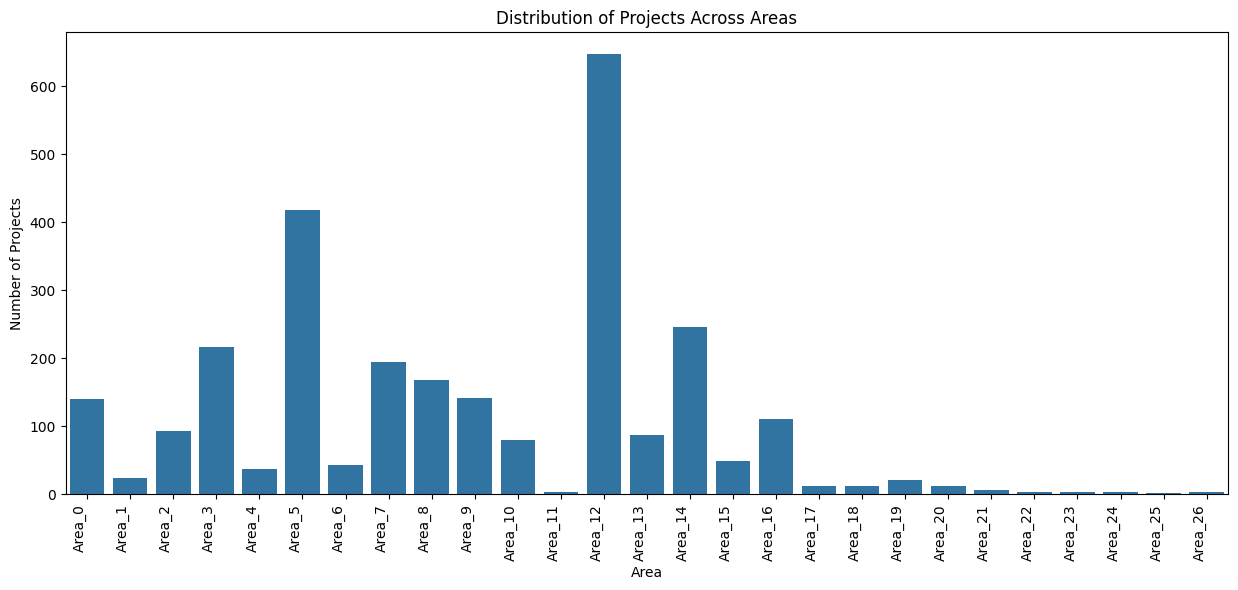

In [ ]:
# Unique values for 'Area_' column
unique_areas = df['Area_'].unique()
plt.figure(figsize=(15, 6))
sns.countplot(x='Area_', data=df)
plt.title('Distribution of Projects Across Areas')
plt.xlabel('Area')
plt.ylabel('Number of Projects')
plt.xticks(rotation=90, ha='right')
plt.show()

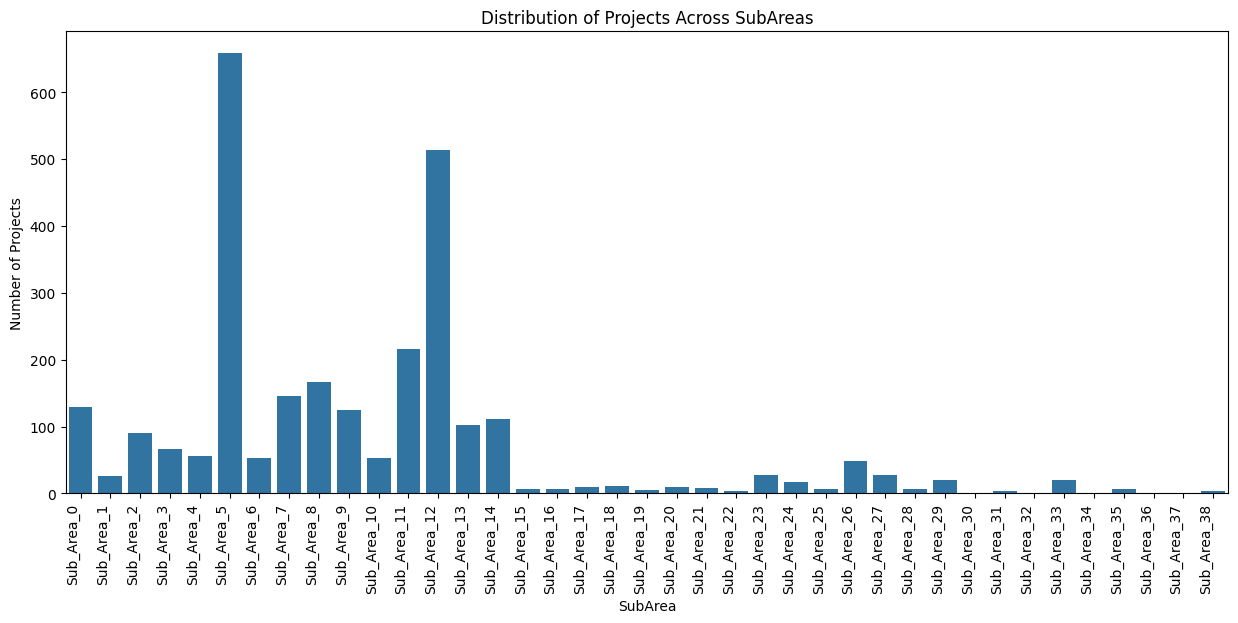

In [ ]:
# Unique values for 'SubArea_' column
unique_subareas = df['SubArea_'].unique()
plt.figure(figsize=(15, 6))
sns.countplot(x='SubArea_', data=df)
plt.title('Distribution of Projects Across SubAreas')
plt.xlabel('SubArea')
plt.ylabel('Number of Projects')
plt.xticks(rotation=90, ha='right')
plt.show()

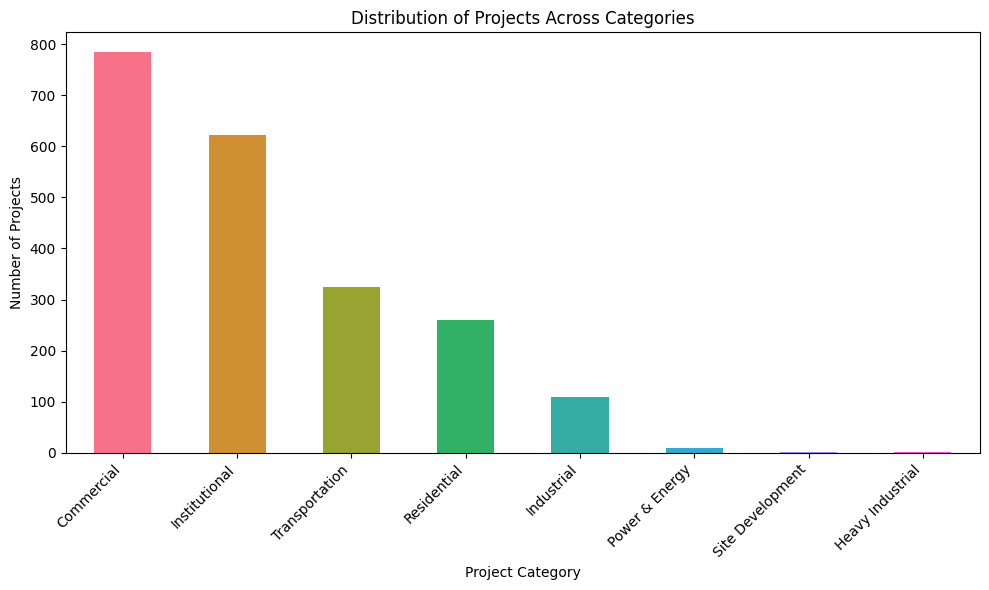

In [ ]:
# Unique values for 'Project_Category' column
project_category_counts = df['Project_Category'].value_counts()
plt.figure(figsize=(10, 6))
colors = sns.color_palette('husl', len(project_category_counts))
project_category_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Projects Across Categories')
plt.xlabel('Project Category')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

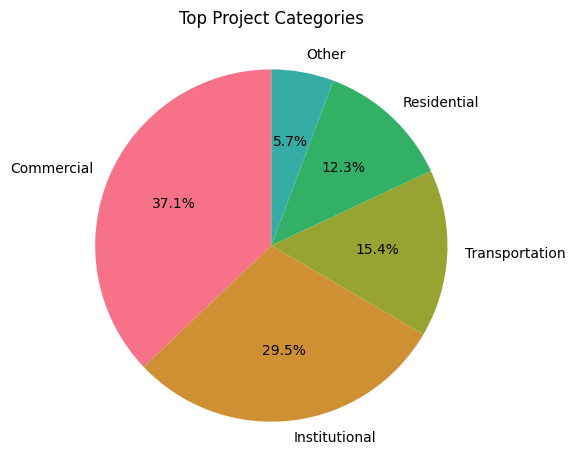

In [ ]:
# Unique values for 'Project_Category' column
top_n = 4
project_category_counts = df['Project_Category'].value_counts()
top_categories = project_category_counts[:top_n]
other_count = project_category_counts[top_n:].sum()
top_categories['Other'] = other_count

plt.figure(figsize=(5, 5))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')
plt.title('Top Project Categories\n')
plt.axis('equal')
plt.show()

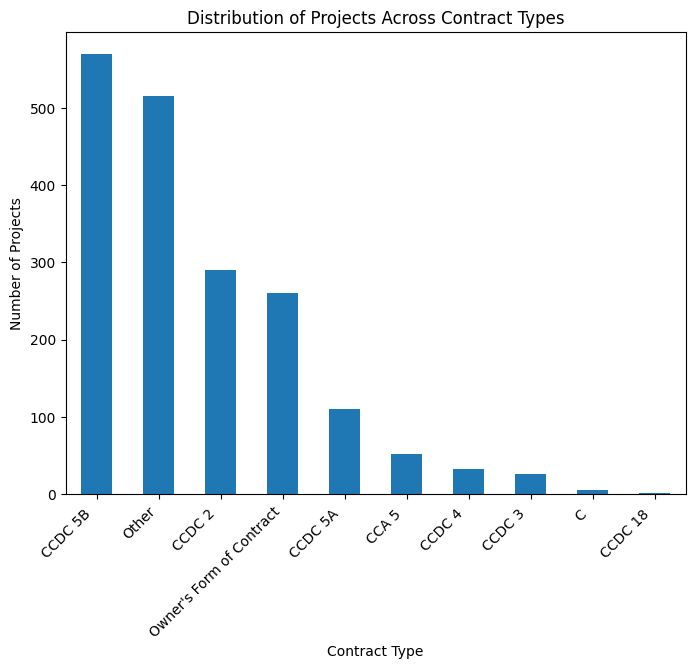

In [ ]:
# Plotting the unique values of 'Contract_Type_'
plt.figure(figsize=(8, 6))
df['Contract_Type_'].value_counts().plot(kind='bar')
plt.title('Distribution of Projects Across Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45, ha='right')
plt.show()


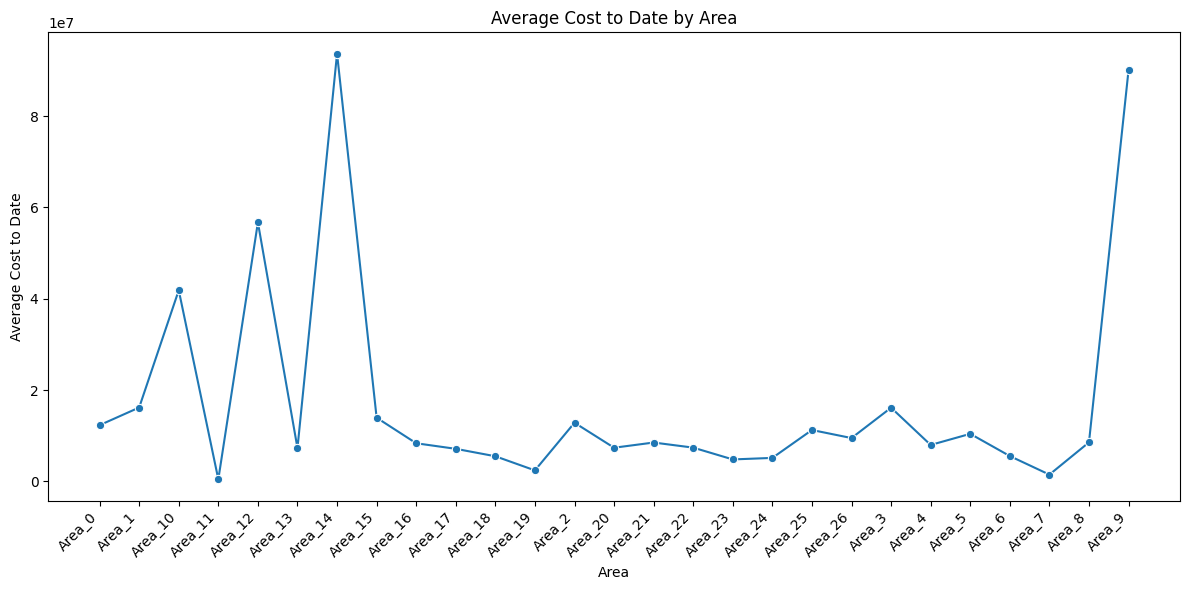

In [ ]:
# prompt: plot a line grraph for connection between Area_ need to groupbey area and CostToDate_

# Group by 'Area_' and calculate the mean 'CostToDate_'
area_cost_data = df.groupby('Area_')['CostToDate_'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Area_', y='CostToDate_', data=area_cost_data, marker='o')
plt.title('Average Cost to Date by Area')
plt.xlabel('Area')
plt.ylabel('Average Cost to Date')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


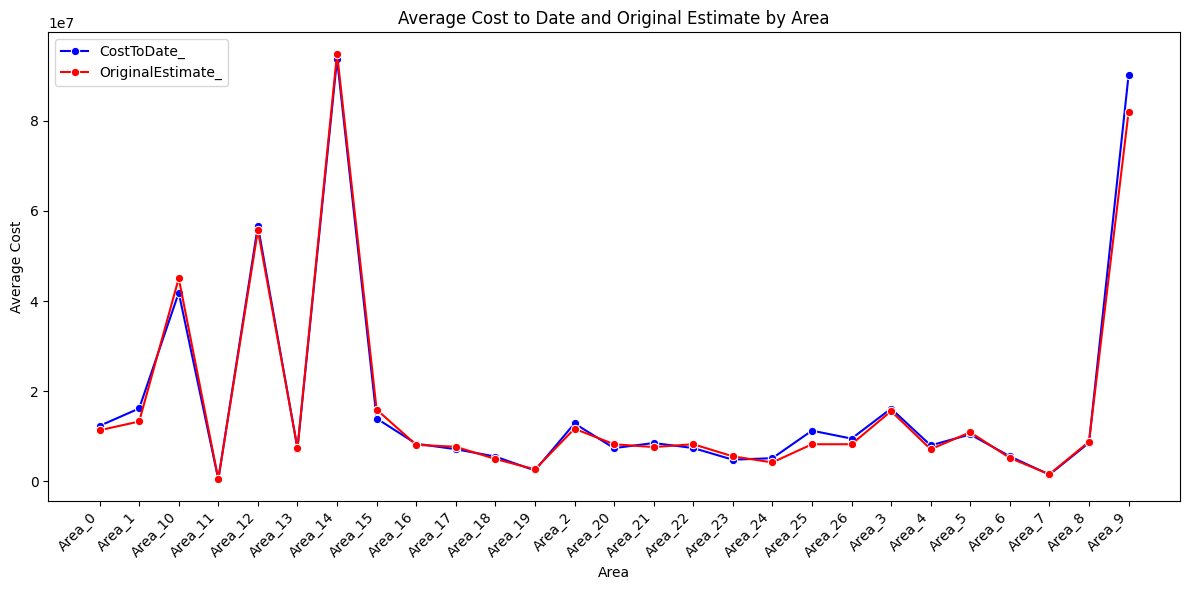

In [ ]:
# prompt: plot a line grraph for connection between Area_ need to groupeby area and CostToDate_ and OriginalEstimate_ use seaborn and use different colors

# Group by 'Area_' and calculate the mean of 'CostToDate_' and 'OriginalEstimate_'
area_cost_data = df.groupby('Area_').agg({'CostToDate_': 'mean', 'OriginalEstimate_': 'mean'}).reset_index()

# Create the line plot with different colors for 'CostToDate_' and 'OriginalEstimate_'
plt.figure(figsize=(12, 6))
sns.lineplot(x='Area_', y='CostToDate_', data=area_cost_data, marker='o', label='CostToDate_', color='blue')
sns.lineplot(x='Area_', y='OriginalEstimate_', data=area_cost_data, marker='o', label='OriginalEstimate_', color='red')
plt.title('Average Cost to Date and Original Estimate by Area')
plt.xlabel('Area')
plt.ylabel('Average Cost')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


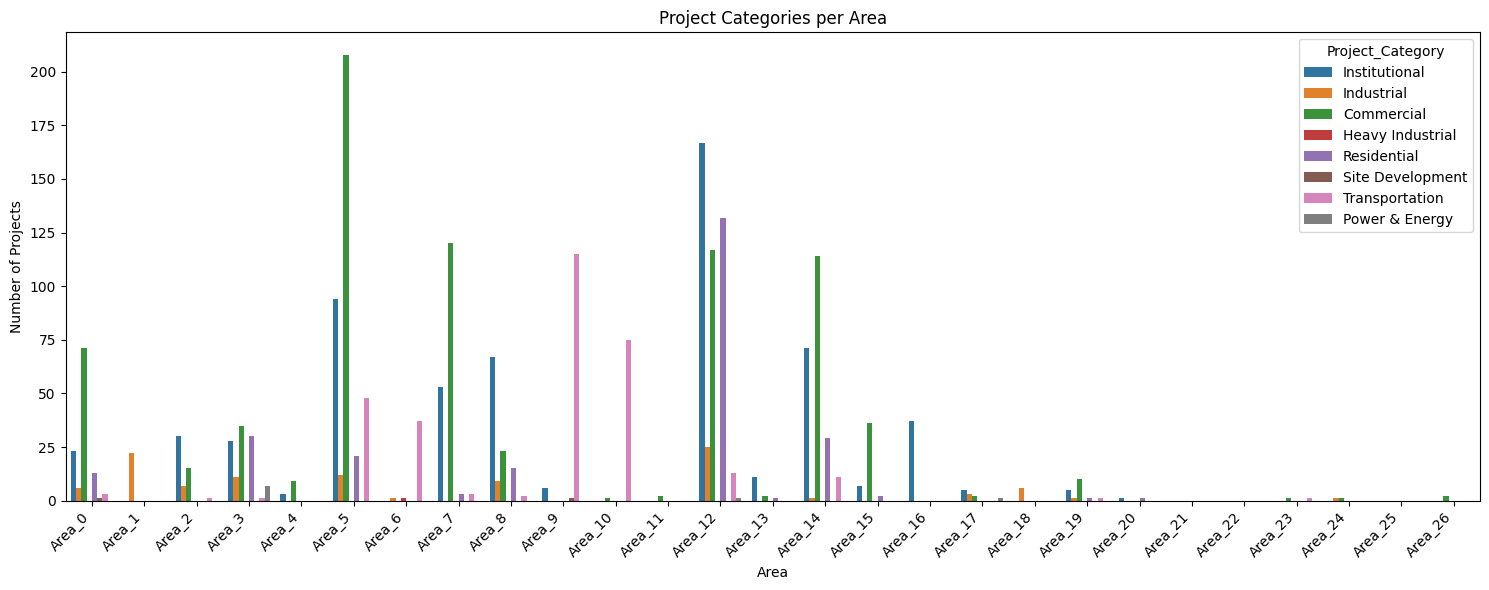

In [ ]:
#Area_ vs Project_Categoty

plt.figure(figsize=(15, 6))
sns.countplot(x='Area_', hue='Project_Category', data=df)
plt.title('Project Categories per Area')
plt.xlabel('Area')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Copy the Original Data
df1 = df.copy()

In [ ]:
# if the project has been finished within the budget then 1 (yes) else 0 (No)
# How much extra money was needed to finished the project.

# Assuming 'OriginalEstimate_' and 'CostToDate_' are numeric columns representing costs.
df1['WithinBudget'] = (df1['OriginalEstimate_'] >= df1['CostToDate_']).astype(int)
df1['ExtraMoneyNeeded'] = df1['CostToDate_'] - df1['OriginalEstimate_']
df1['ExtraMoneyNeeded'] = df1['ExtraMoneyNeeded'].apply(lambda x: 0 if x < 0 else x)
df1.head(15)

,IDProject_,Area_,SubArea_,projectPhase_,OriginalEstimate_,CostToDate_,Project_Category,Contract_Type_,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_,WithinBudget,ExtraMoneyNeeded
0,IDProject_0,Area_0,Sub_Area_0,Completed,"951,920.00","1,155,156.88",Institutional,CCDC 2,2012-08-15,2012-12-23,2013-04-02,0,"203,236.88"
1,IDProject_1,Area_1,Sub_Area_1,Completed,"147,839.60","133,448.08",Industrial,CCDC 5B,2012-09-01,2015-03-04,2015-05-25,1,0.00
2,IDProject_2,Area_1,Sub_Area_1,Completed,"60,705.18","42,459.56",Industrial,CCDC 5B,2012-09-01,2013-01-01,2012-11-12,1,0.00
3,IDProject_3,Area_2,Sub_Area_2,Completed,"280,482.79","300,362.07",Commercial,CCDC 5A,2012-07-11,2015-01-11,2014-08-31,0,"19,879.28"
4,IDProject_4,Area_3,Sub_Area_3,Completed,"2,833,995.78","2,747,139.61",Industrial,CCDC 2,2012-10-03,2013-02-28,2013-07-01,1,0.00
5,IDProject_4,Area_3,Sub_Area_3,Completed,"2,833,995.78","1,863,670.23",Industrial,CCDC 2,2012-10-03,2013-02-28,2013-08-10,1,0.00
6,IDProject_5,Area_4,Sub_Area_4,Completed,"8,218,625.68","14,763,299.58",Commercial,NaN,2012-03-31,2014-10-01,2014-05-13,0,"6,544,673.90"
7,IDProject_6,Area_5,Sub_Area_5,Completed,"3,015,325.59","4,318,493.70",Commercial,CCDC 2,2012-09-01,2013-01-31,2013-03-24,0,"1,303,168.11"
8,IDProject_7,Area_6,Sub_Area_6,Completed,"486,106.57","500,529.68",Heavy Industrial,Owner's Form of Contract,2012-09-06,2012-11-25,2012-11-07,0,"14,423.11"
9,IDProject_8,Area_7,Sub_Area_5,Completed,"671,144.48","42,644.76",Commercial,Other,2012-08-16,2012-10-15,2012-08-18,1,0.00


In [ ]:
# if the project has been finished within the EstimatedFinalCompletion_ then 1 (yes) else 0 (No)
# How much extra days was needed to finished the project.

# Convert date columns to datetime objects
df1['Start_Date_'] = pd.to_datetime(df1['Start_Date_'])
df1['EstimatedFinalCompletion_'] = pd.to_datetime(df1['EstimatedFinalCompletion_'])
df1['Actual_End_Date_'] = pd.to_datetime(df1['Actual_End_Date_'])

# Calculate if the project finished within the estimated completion date
df1['OnTimeCompletion'] = (df1['Actual_End_Date_'] <= df1['EstimatedFinalCompletion_']).astype(int)

# Calculate the extra days needed to complete the project
df1['ExtraDays'] = (df1['Actual_End_Date_'] - df1['EstimatedFinalCompletion_']).dt.days
df1['ExtraDays'] = df1['ExtraDays'].apply(lambda x: 0 if x < 0 else x)

df1.head(15)

,IDProject_,Area_,SubArea_,projectPhase_,OriginalEstimate_,CostToDate_,Project_Category,Contract_Type_,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_,WithinBudget,ExtraMoneyNeeded,OnTimeCompletion,ExtraDays
0,IDProject_0,Area_0,Sub_Area_0,Completed,"951,920.00","1,155,156.88",Institutional,CCDC 2,2012-08-15,2012-12-23,2013-04-02,0,"203,236.88",0,100.00
1,IDProject_1,Area_1,Sub_Area_1,Completed,"147,839.60","133,448.08",Industrial,CCDC 5B,2012-09-01,2015-03-04,2015-05-25,1,0.00,0,82.00
2,IDProject_2,Area_1,Sub_Area_1,Completed,"60,705.18","42,459.56",Industrial,CCDC 5B,2012-09-01,2013-01-01,2012-11-12,1,0.00,1,0.00
3,IDProject_3,Area_2,Sub_Area_2,Completed,"280,482.79","300,362.07",Commercial,CCDC 5A,2012-07-11,2015-01-11,2014-08-31,0,"19,879.28",1,0.00
4,IDProject_4,Area_3,Sub_Area_3,Completed,"2,833,995.78","2,747,139.61",Industrial,CCDC 2,2012-10-03,2013-02-28,2013-07-01,1,0.00,0,123.00
5,IDProject_4,Area_3,Sub_Area_3,Completed,"2,833,995.78","1,863,670.23",Industrial,CCDC 2,2012-10-03,2013-02-28,2013-08-10,1,0.00,0,163.00
6,IDProject_5,Area_4,Sub_Area_4,Completed,"8,218,625.68","14,763,299.58",Commercial,NaN,2012-03-31,2014-10-01,2014-05-13,0,"6,544,673.90",1,0.00
7,IDProject_6,Area_5,Sub_Area_5,Completed,"3,015,325.59","4,318,493.70",Commercial,CCDC 2,2012-09-01,2013-01-31,2013-03-24,0,"1,303,168.11",0,52.00
8,IDProject_7,Area_6,Sub_Area_6,Completed,"486,106.57","500,529.68",Heavy Industrial,Owner's Form of Contract,2012-09-06,2012-11-25,2012-11-07,0,"14,423.11",1,0.00
9,IDProject_8,Area_7,Sub_Area_5,Completed,"671,144.48","42,644.76",Commercial,Other,2012-08-16,2012-10-15,2012-08-18,1,0.00,1,0.00


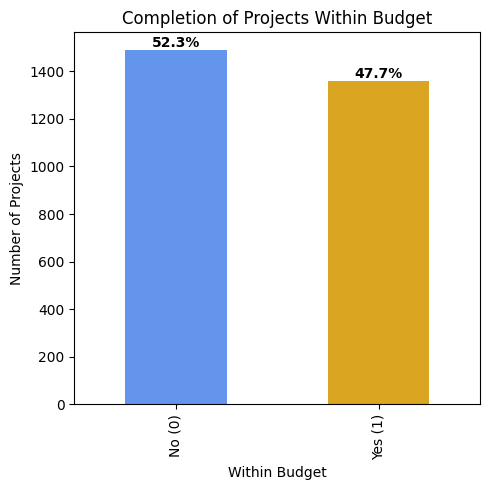

In [ ]:
# How many projects have been finished within the Estimated Cost
counts = df1['WithinBudget'].value_counts().sort_index()
total = counts.sum()
percentages = (counts / total * 100).round(1)

# Plot
plt.figure(figsize=(5, 5))
colors =  ['cornflowerblue', 'goldenrod']  # Customize colors for 0 and 1
ax = counts.plot(kind='bar', color=colors)

# Set custom tick labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['No (0)', 'Yes (1)'])

# Add percentage labels on top of bars
for i, (count, pct) in enumerate(zip(counts, percentages)):
    ax.text(i, count + 1, f'{pct}%', ha='center', va='bottom', fontweight='bold')

# Labels and title
plt.title('Completion of Projects Within Budget')
plt.xlabel('Within Budget')
plt.ylabel('Number of Projects')
plt.tight_layout()
plt.show()

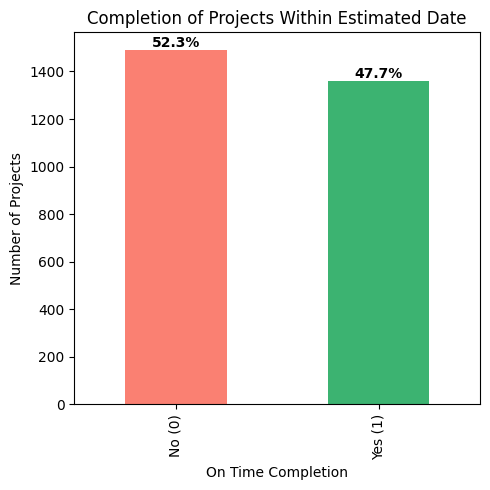

In [ ]:
# How many project have been finished within the Estimated Data
counts = df1['OnTimeCompletion'].value_counts().sort_index()
total = counts.sum()
percentages = (counts / total * 100).round(1)

# Plot
plt.figure(figsize=(5, 5))
colors = ['salmon', 'mediumseagreen']  # Different colors for No and Yes
ax = counts.plot(kind='bar', color=colors)

# Custom tick labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['No (0)', 'Yes (1)'])

# Add percentage text above bars
for i, (count, pct) in enumerate(zip(counts, percentages)):
    ax.text(i, count + 1, f'{pct}%', ha='center', va='bottom', fontweight='bold')

# Labels and title
plt.title('Completion of Projects Within Estimated Date')
plt.xlabel('On Time Completion')
plt.ylabel('Number of Projects')
plt.tight_layout()
plt.show()

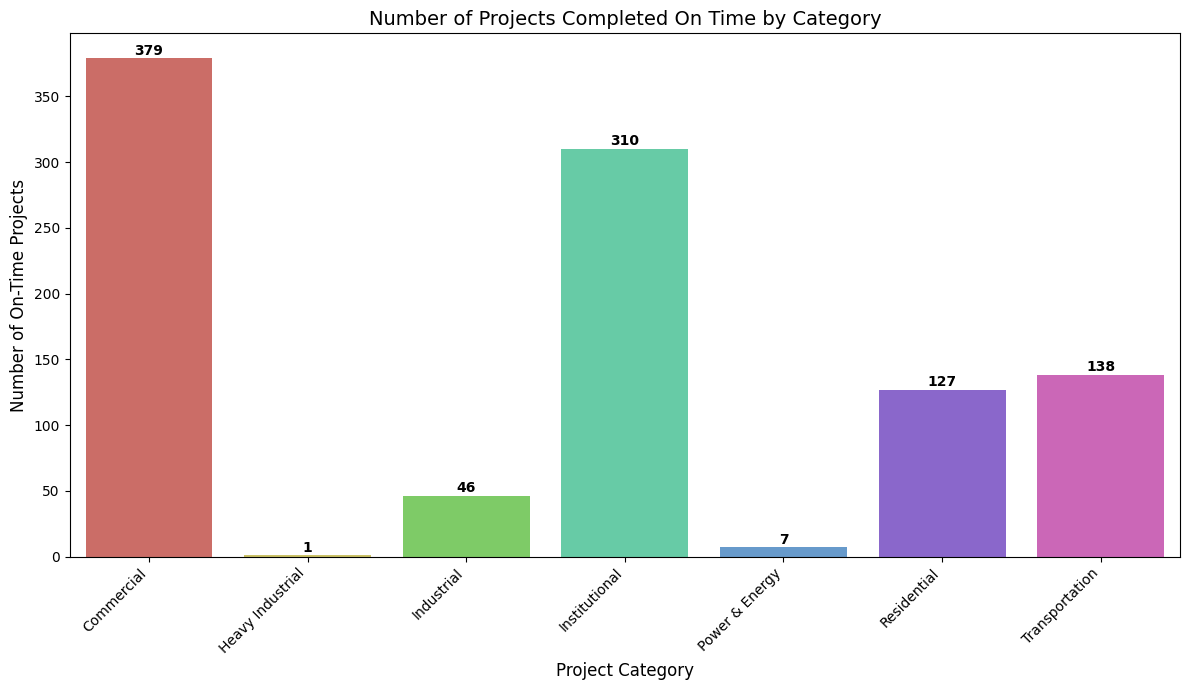

In [ ]:
# prompt: plot a bar where it show how many different project_catorgy has been finished OnTimeCompletion.

# Filter out projects not finished on time
on_time = df1[df1['OnTimeCompletion'] == 1]

# Group by 'Project_Category' and count the occurrences
project_completion = on_time.groupby('Project_Category')['OnTimeCompletion'].sum()

# Set up the figure
plt.figure(figsize=(12, 7))
colors = sns.color_palette("hls", len(project_completion))  # Different color for each bar

# Plot with Seaborn
barplot = sns.barplot(
    x=project_completion.index,
    y=project_completion.values,
    palette=colors
)

# Add value labels on top of bars
for i, value in enumerate(project_completion.values):
    barplot.text(i, value + 0.5, str(int(value)), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Set titles and labels
plt.title('Number of Projects Completed On Time by Category', fontsize=14)
plt.xlabel('Project Category', fontsize=12)
plt.ylabel('Number of On-Time Projects', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

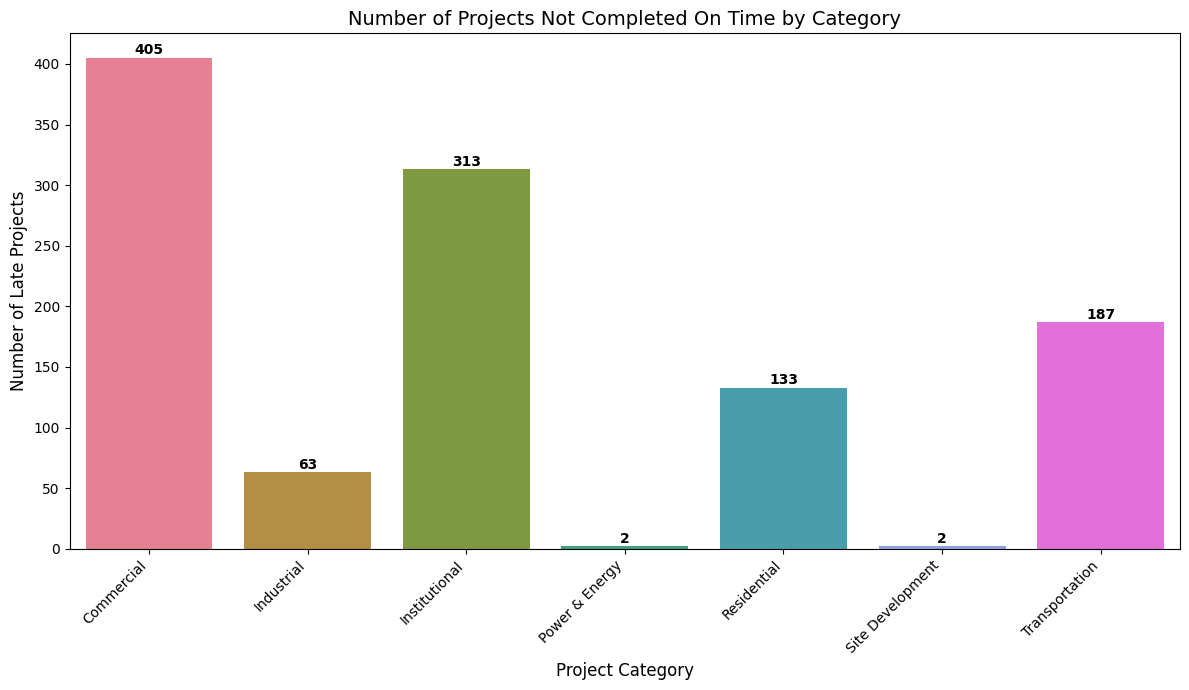

In [ ]:
# prompt: plot a bar where it show how many different project_catorgy has not been finished OnTimeCompletion.

# Filter out projects not finished on time
not_on_time = df1[df1['OnTimeCompletion'] == 0]

# Group by 'Project_Category' and count the occurrences
project_category_counts = not_on_time.groupby('Project_Category')['OnTimeCompletion'].count()

plt.figure(figsize=(12, 7))
colors = sns.color_palette("husl", len(project_category_counts))  # Different colors

# Plot with Seaborn
barplot = sns.barplot(
    x=project_category_counts.index,
    y=project_category_counts.values,
    palette=colors
)

# Add count labels on top of each bar
for i, value in enumerate(project_category_counts.values):
    barplot.text(i, value + 0.5, str(int(value)), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Set titles and labels
plt.title('Number of Projects Not Completed On Time by Category', fontsize=14)
plt.xlabel('Project Category', fontsize=12)
plt.ylabel('Number of Late Projects', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

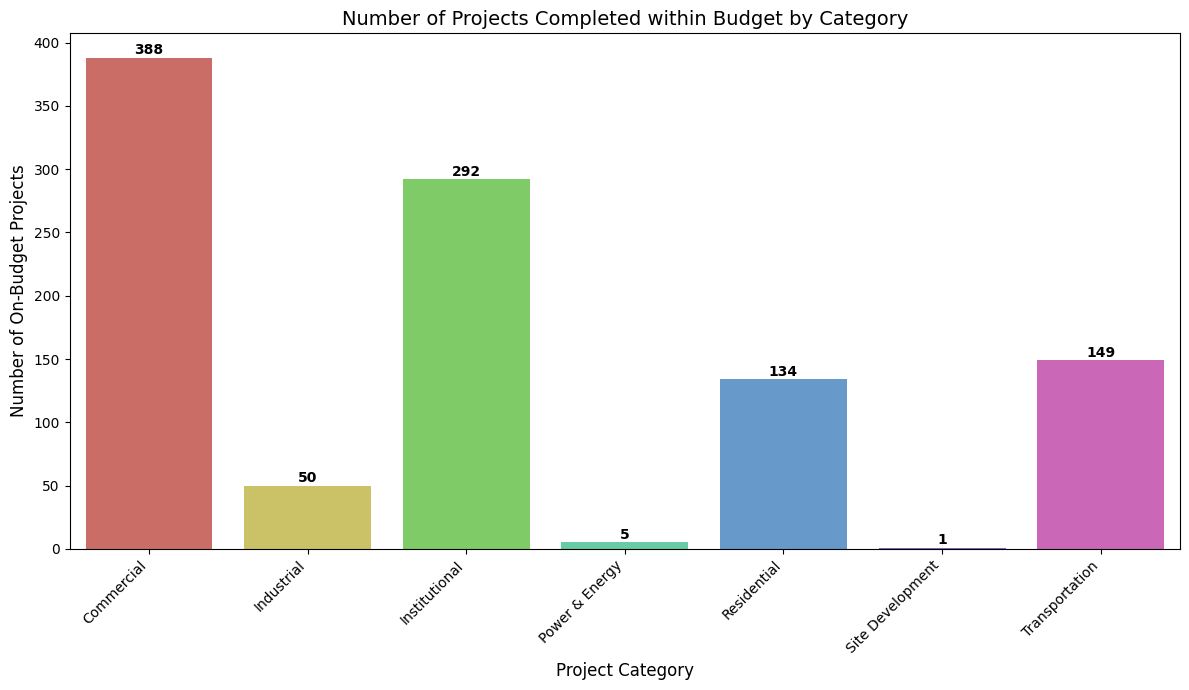

In [ ]:
# Filter out projects finished on Budget
on_budget = df1[df1['WithinBudget'] == 1]

# Group by 'Project_Category' and count the occurrences
project_completion = on_budget.groupby('Project_Category')['WithinBudget'].sum()

# Set up the figure
plt.figure(figsize=(12, 7))
colors = sns.color_palette("hls", len(project_completion))  # Different color for each bar

# Plot with Seaborn
barplot = sns.barplot(
    x=project_completion.index,
    y=project_completion.values,
    palette=colors
)

# Add value labels on top of bars
for i, value in enumerate(project_completion.values):
    barplot.text(i, value + 0.5, str(int(value)), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Set titles and labels
plt.title('Number of Projects Completed within Budget by Category', fontsize=14)
plt.xlabel('Project Category', fontsize=12)
plt.ylabel('Number of On-Budget Projects', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

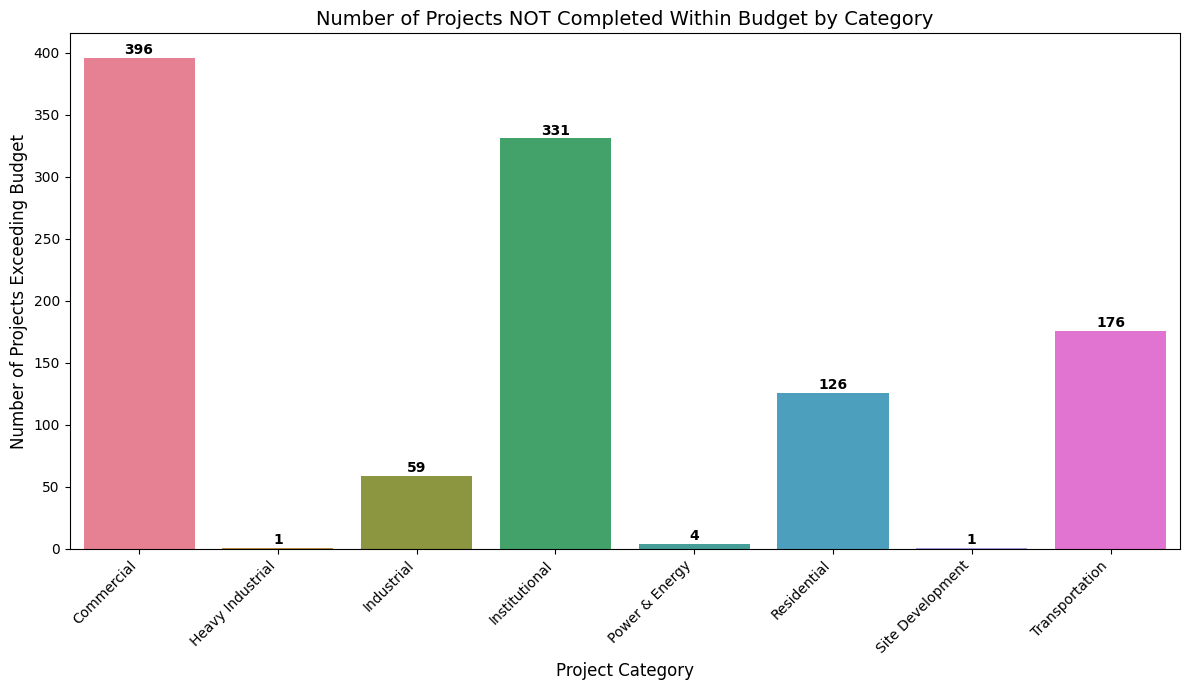

In [ ]:
# Plot bar for each Project_Category which is not finished within the budget.

# Filter out projects NOT finished within the budget
not_on_budget = df1[df1['WithinBudget'] == 0]

# Group by 'Project_Category' and count the occurrences
project_category_counts = not_on_budget.groupby('Project_Category')['WithinBudget'].count()

plt.figure(figsize=(12, 7))
colors = sns.color_palette("husl", len(project_category_counts))  # Different colors

# Plot with Seaborn
barplot = sns.barplot(
    x=project_category_counts.index,
    y=project_category_counts.values,
    palette=colors
)

# Add count labels on top of each bar
for i, value in enumerate(project_category_counts.values):
    barplot.text(i, value + 0.5, str(int(value)), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Set titles and labels
plt.title('Number of Projects NOT Completed Within Budget by Category', fontsize=14)
plt.xlabel('Project Category', fontsize=12)
plt.ylabel('Number of Projects Exceeding Budget', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

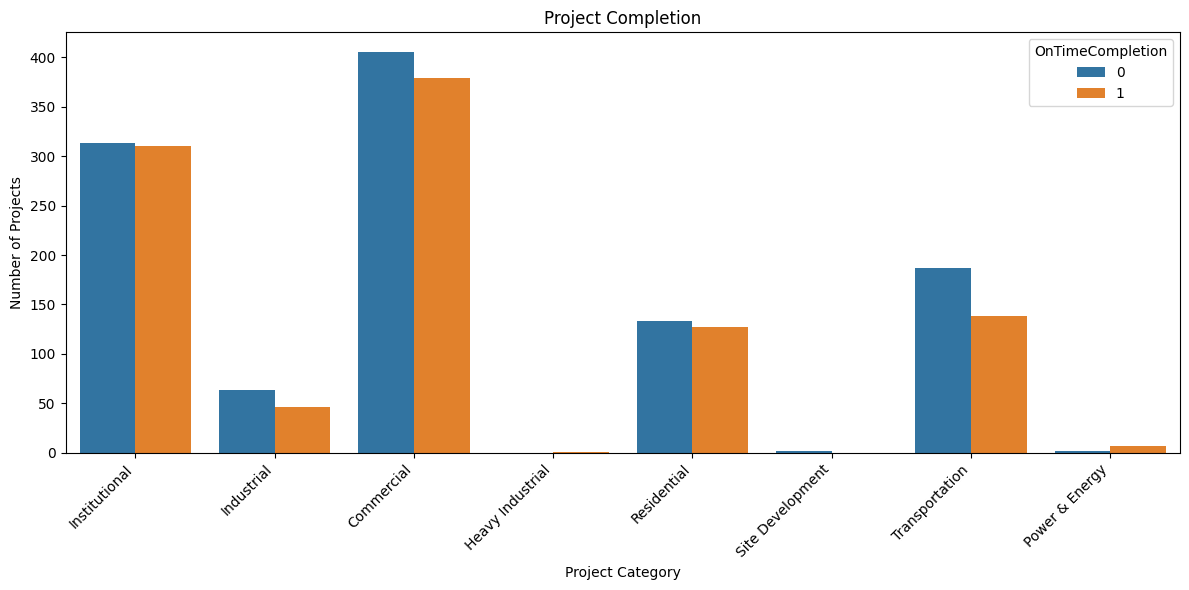

In [ ]:
# Project Category vs Project Compeletion

plt.figure(figsize=(12, 6))
sns.countplot(x='Project_Category', hue='OnTimeCompletion', data=df1)
plt.title('Project Completion')
plt.xlabel('Project Category')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

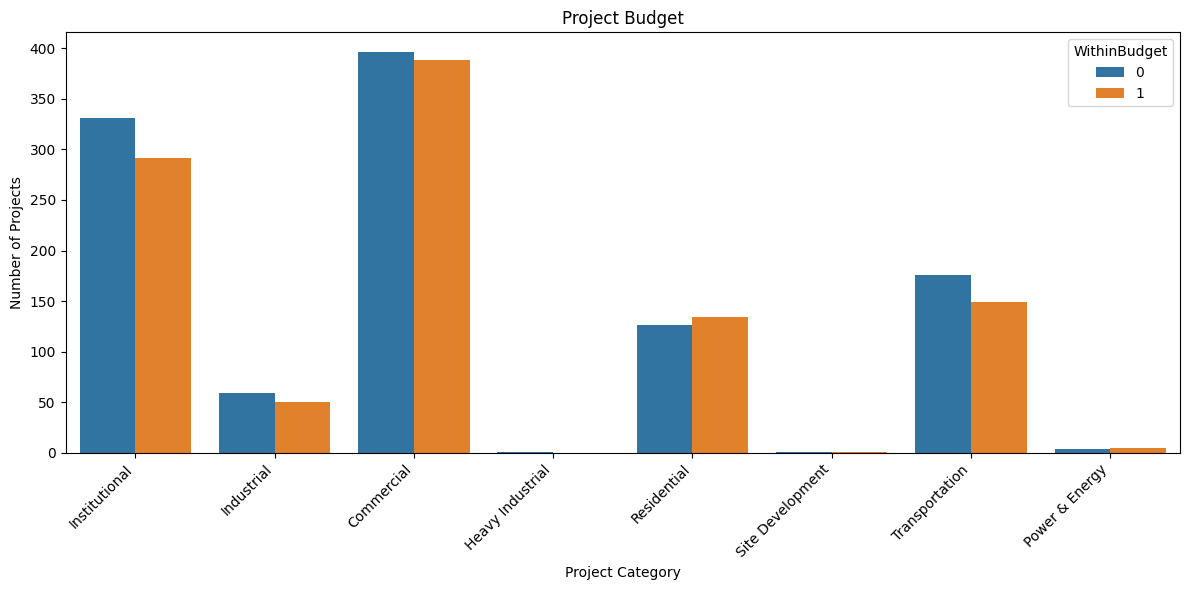

In [ ]:
# Project Category vs Project Budget
plt.figure(figsize=(12, 6))
sns.countplot(x='Project_Category', hue='WithinBudget', data=df1)
plt.title('Project Budget')
plt.xlabel('Project Category')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

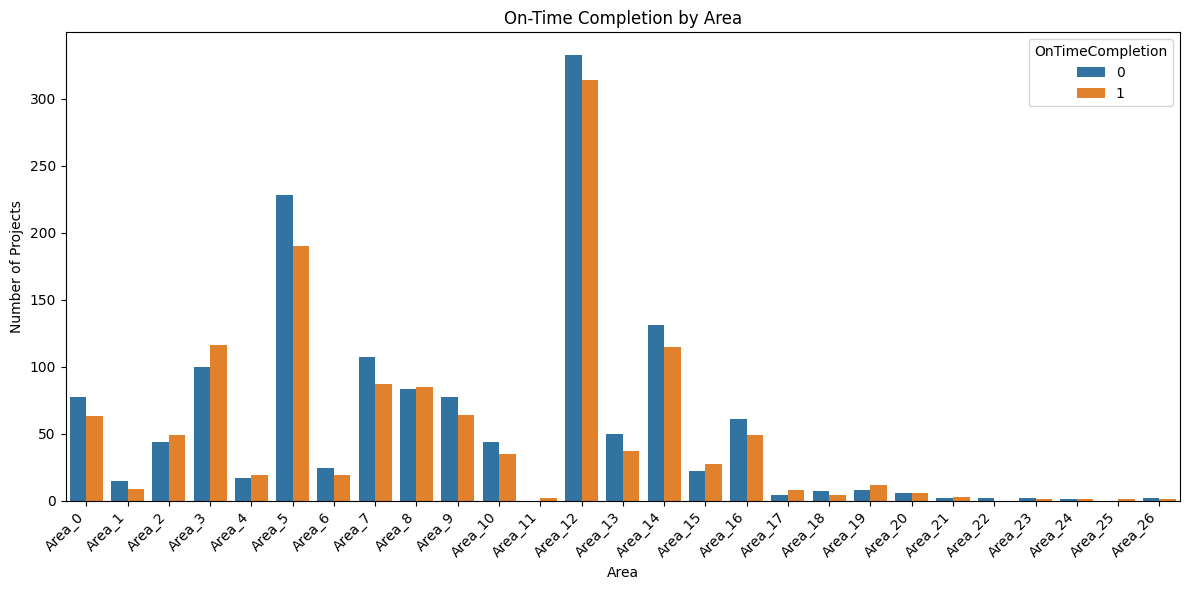

In [ ]:
# prompt: Plot Area_ group by vs OnTimeCompeletion

plt.figure(figsize=(12, 6))
sns.countplot(x='Area_', hue='OnTimeCompletion', data=df1)
plt.title('On-Time Completion by Area')
plt.xlabel('Area')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Data Preparation

In [ ]:
df_cost = df.copy()

In [ ]:
# Don't need the projectPhase and Contract_type
df_cost.drop(['projectPhase_', 'Contract_Type_', 'IDProject_'], axis=1, inplace=True)

In [ ]:
df_cost.shape

(2849, 8)

In [ ]:
# Drop the rows where df_cost["CostToDate_"] is null.
# Total 85 rows is null for df_cost["CostToDate_"]
df_cost.dropna(subset=['CostToDate_'], inplace=True)

In [ ]:
df_cost.isnull().sum()

,0
Area_,82
SubArea_,84
OriginalEstimate_,83
CostToDate_,0
Project_Category,718
Start_Date_,84
EstimatedFinalCompletion_,84
Actual_End_Date_,81


In [ ]:
# Similar areas has same OriginalEstimate_ (budget)
# Create a list which will have the unique Area_
unique_areas = df_cost['Area_'].unique()

# Create an dict which will store the {Area_: Frequent_value}
freq_values = {}


for area in unique_areas:
    area_df = df_cost[df_cost['Area_'] == area]
    estimates = area_df['OriginalEstimate_'].dropna()

    if not estimates.empty:
        mode_series = estimates.mode()
        if not mode_series.empty:
            mode_value = mode_series[0]
            freq_values[area] = float(mode_value)

print(freq_values)

# Create a new Series mapping area to its most frequent estimate
area_freq_series = df_cost['Area_'].map(freq_values)

# Only fill NaNs in 'OriginalEstimate_' where needed
df_cost['OriginalEstimate_'] = df_cost['OriginalEstimate_'].fillna(area_freq_series)

{'Area_0': 8218625.68, 'Area_1': 8218625.68, 'Area_2': 8218625.68, 'Area_3': 8218625.68, 'Area_4': 8218625.68, 'Area_5': 8218625.68, 'Area_6': 7291240.0, 'Area_7': 8218625.68, 'Area_8': 8218625.68, 'Area_9': 8218625.68, 'Area_10': 17247718.03, 'Area_11': 269407.96, 'Area_12': 8218625.68, 'Area_13': 8218625.68, 'Area_14': 8218625.68, 'Area_15': 19746597.73, 'Area_16': 8218625.68, 'Area_17': 8218625.68, 'Area_18': 8218625.68, 'Area_19': 8218625.68, 'Area_20': 8218625.68, 'Area_21': 8218625.68, 'Area_22': 8218625.68, 'Area_23': 8218625.68, 'Area_24': 8218625.68, 'Area_25': 8218625.68, 'Area_26': 8218625.68}


In [ ]:
df_cost.dropna(subset=['OriginalEstimate_'], inplace=True)

In [ ]:
print(df_cost['OriginalEstimate_'].isnull().sum())
print(df_cost['CostToDate_'].isnull().sum())

0
0


In [ ]:
# Current size of the data
df_cost.shape

(2761, 8)

In [ ]:
#Fill the Null values of df_cost[Start_Date_] with the immediate upper value.

# Fill NaN values in 'Start_Date_' with the immediate upper value
df_cost['Start_Date_'] = df_cost['Start_Date_'].fillna(method='ffill')
df_cost['EstimatedFinalCompletion_'] = df_cost['EstimatedFinalCompletion_'].fillna(method='ffill')
df_cost['Actual_End_Date_'] = df_cost['Actual_End_Date_'].fillna(method='ffill')

# For Area and SubArea_
df_cost['Area_'] = df_cost['Area_'].fillna(method='ffill')
df_cost['SubArea_'] = df_cost['SubArea_'].fillna(method='ffill')


In [ ]:
# Fill the empty df_cost['Project_Category] based on the matched df_cost["SubArea_"]
# Step 2: Create mappings
subarea_to_category = (
    df_cost[df_cost['Project_Category'].notna()]
    .groupby('SubArea_')['Project_Category']
    .agg(lambda x: x.mode().iloc[0])
    .to_dict()
)

area_to_category = (
    df_cost[df_cost['Project_Category'].notna()]
    .groupby('Area_')['Project_Category']
    .agg(lambda x: x.mode().iloc[0])
    .to_dict()
)

# Step 3: Fill based on SubArea_, then Area_, then leave empty
def fill_project_category(row):
    if pd.notna(row['Project_Category']):
        return row['Project_Category']
    elif row['SubArea_'] in subarea_to_category:
        return subarea_to_category[row['SubArea_']]
    elif row['Area_'] in area_to_category:
        return area_to_category[row['Area_']]
    else:
        return np.nan

# Apply the function
df_cost['Project_Category'] = df_cost.apply(fill_project_category, axis=1)

In [ ]:
# Drop rows with NaN values in 'Project_Category'
df_cost.dropna(subset=['Project_Category'], inplace=True)

In [ ]:
df_cost.isnull().sum()

,0
Area_,0
SubArea_,0
OriginalEstimate_,0
CostToDate_,0
Project_Category,0
Start_Date_,0
EstimatedFinalCompletion_,0
Actual_End_Date_,0


In [ ]:
df_cost.head(25)

,Area_,SubArea_,OriginalEstimate_,CostToDate_,Project_Category,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_
0,Area_0,Sub_Area_0,"951,920.00","1,155,156.88",Institutional,2012-08-15,2012-12-23,2013-04-02
1,Area_1,Sub_Area_1,"147,839.60","133,448.08",Industrial,2012-09-01,2015-03-04,2015-05-25
2,Area_1,Sub_Area_1,"60,705.18","42,459.56",Industrial,2012-09-01,2013-01-01,2012-11-12
3,Area_2,Sub_Area_2,"280,482.79","300,362.07",Commercial,2012-07-11,2015-01-11,2014-08-31
4,Area_3,Sub_Area_3,"2,833,995.78","2,747,139.61",Industrial,2012-10-03,2013-02-28,2013-07-01
5,Area_3,Sub_Area_3,"2,833,995.78","1,863,670.23",Industrial,2012-10-03,2013-02-28,2013-08-10
6,Area_4,Sub_Area_4,"8,218,625.68","14,763,299.58",Commercial,2012-03-31,2014-10-01,2014-05-13
7,Area_5,Sub_Area_5,"3,015,325.59","4,318,493.70",Commercial,2012-09-01,2013-01-31,2013-03-24
8,Area_6,Sub_Area_6,"486,106.57","500,529.68",Heavy Industrial,2012-09-06,2012-11-25,2012-11-07
9,Area_7,Sub_Area_5,"671,144.48","42,644.76",Commercial,2012-08-16,2012-10-15,2012-08-18


In [ ]:
df_cost.tail(25)

,Area_,SubArea_,OriginalEstimate_,CostToDate_,Project_Category,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_
2824,Area_14,Sub_Area_11,"8,218,625.68","9,462,226.66",Residential,2008-05-01,2008-09-28,2008-04-20
2825,Area_14,Sub_Area_11,"8,218,625.68","5,488,553.06",Residential,2008-05-01,2009-02-28,2009-04-29
2826,Area_14,Sub_Area_11,"8,218,625.68","8,855,818.23",Institutional,2008-04-30,2010-10-31,2010-11-28
2827,Area_14,Sub_Area_11,"8,218,625.68","7,967,935.66",Industrial,2008-10-18,2009-10-31,2010-01-18
2828,Area_0,Sub_Area_11,"8,218,625.68","10,017,017.88",Institutional,2004-10-01,2007-04-03,2007-04-30
2829,Area_8,Sub_Area_8,"8,218,625.68","6,157,287.35",Institutional,2004-09-08,2007-03-11,2006-12-24
2830,Area_9,Sub_Area_9,"8,218,625.68","4,962,790.75",Transportation,2005-10-01,2008-04-02,2008-03-18
2831,Area_9,Sub_Area_9,"8,218,625.68","9,690,370.78",Transportation,2005-06-09,2007-12-10,2007-11-10
2832,Area_9,Sub_Area_9,"8,218,625.68","8,331,058.20",Transportation,2005-09-30,2008-04-01,2008-04-29
2833,Area_9,Sub_Area_9,"8,218,625.68","7,684,281.80",Transportation,2006-02-28,2006-09-29,2006-06-17


#### Added additional columns derived from Date and Cost

In [ ]:
#### Cost ####
# If the project has been finished within the budget then 1 (yes) else 0 (No)
# How much extra money was needed to finished the project.

df_cost['WithinBudget'] = (df_cost['OriginalEstimate_'] >= df_cost['CostToDate_']).astype(int)
df_cost['CostOverrunAmount'] = df_cost['CostToDate_'] - df_cost['OriginalEstimate_']
df_cost['CostOverrunAmount'] = df_cost['CostOverrunAmount'].apply(lambda x: 0 if x < 0 else x)
df_cost.head(15)

,Area_,SubArea_,OriginalEstimate_,CostToDate_,Project_Category,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_,WithinBudget,CostOverrunAmount
0,Area_0,Sub_Area_0,"951,920.00","1,155,156.88",Institutional,2012-08-15,2012-12-23,2013-04-02,0,"203,236.88"
1,Area_1,Sub_Area_1,"147,839.60","133,448.08",Industrial,2012-09-01,2015-03-04,2015-05-25,1,0.00
2,Area_1,Sub_Area_1,"60,705.18","42,459.56",Industrial,2012-09-01,2013-01-01,2012-11-12,1,0.00
3,Area_2,Sub_Area_2,"280,482.79","300,362.07",Commercial,2012-07-11,2015-01-11,2014-08-31,0,"19,879.28"
4,Area_3,Sub_Area_3,"2,833,995.78","2,747,139.61",Industrial,2012-10-03,2013-02-28,2013-07-01,1,0.00
5,Area_3,Sub_Area_3,"2,833,995.78","1,863,670.23",Industrial,2012-10-03,2013-02-28,2013-08-10,1,0.00
6,Area_4,Sub_Area_4,"8,218,625.68","14,763,299.58",Commercial,2012-03-31,2014-10-01,2014-05-13,0,"6,544,673.90"
7,Area_5,Sub_Area_5,"3,015,325.59","4,318,493.70",Commercial,2012-09-01,2013-01-31,2013-03-24,0,"1,303,168.11"
8,Area_6,Sub_Area_6,"486,106.57","500,529.68",Heavy Industrial,2012-09-06,2012-11-25,2012-11-07,0,"14,423.11"
9,Area_7,Sub_Area_5,"671,144.48","42,644.76",Commercial,2012-08-16,2012-10-15,2012-08-18,1,0.00


In [ ]:
#### Dates ####

# if the project has been finished within the EstimatedFinalCompletion_ then 1 (yes) else 0 (No)
# How much extra days was needed to finished the project.

# Convert date columns to datetime objects
df_cost['Start_Date_'] = pd.to_datetime(df_cost['Start_Date_'])
df_cost['EstimatedFinalCompletion_'] = pd.to_datetime(df_cost['EstimatedFinalCompletion_'])
df_cost['Actual_End_Date_'] = pd.to_datetime(df_cost['Actual_End_Date_'])

# Calculate if the project finished within the estimated completion date
df_cost['OnTimeCompletion'] = (df_cost['Actual_End_Date_'] <= df_cost['EstimatedFinalCompletion_']).astype(int)

# Actual Planned Duration: EstimatedFinalCompletion_ - Start_Date_
df_cost['PlannedDuration'] = (df_cost['EstimatedFinalCompletion_'] - df_cost['Start_Date_']).dt.days
df_cost['PlannedDuration'] = df_cost['PlannedDuration'].apply(lambda x: 0 if x < 0 else x)

# Actual Duration (in days): Actual_End_Date_ - Start_Date_
df_cost['ActualDuration'] = (df_cost['Actual_End_Date_'] - df_cost['Start_Date_']).dt.days
df_cost['ActualDuration'] = df_cost['ActualDuration'].apply(lambda x: 0 if x < 0 else x)

# Delays
# Calculate the extra days needed to complete the project
df_cost['Delay'] = (df_cost['Actual_End_Date_'] - df_cost['EstimatedFinalCompletion_']).dt.days
df_cost['Delay'] = df_cost['Delay'].apply(lambda x: 0 if x < 0 else x)

df_cost.head(15)

,Area_,SubArea_,OriginalEstimate_,CostToDate_,Project_Category,Start_Date_,EstimatedFinalCompletion_,Actual_End_Date_,WithinBudget,CostOverrunAmount,OnTimeCompletion,PlannedDuration,ActualDuration,Delay
0,Area_0,Sub_Area_0,"951,920.00","1,155,156.88",Institutional,2012-08-15,2012-12-23,2013-04-02,0,"203,236.88",0,130,230,100
1,Area_1,Sub_Area_1,"147,839.60","133,448.08",Industrial,2012-09-01,2015-03-04,2015-05-25,1,0.00,0,914,996,82
2,Area_1,Sub_Area_1,"60,705.18","42,459.56",Industrial,2012-09-01,2013-01-01,2012-11-12,1,0.00,1,122,72,0
3,Area_2,Sub_Area_2,"280,482.79","300,362.07",Commercial,2012-07-11,2015-01-11,2014-08-31,0,"19,879.28",1,914,781,0
4,Area_3,Sub_Area_3,"2,833,995.78","2,747,139.61",Industrial,2012-10-03,2013-02-28,2013-07-01,1,0.00,0,148,271,123
5,Area_3,Sub_Area_3,"2,833,995.78","1,863,670.23",Industrial,2012-10-03,2013-02-28,2013-08-10,1,0.00,0,148,311,163
6,Area_4,Sub_Area_4,"8,218,625.68","14,763,299.58",Commercial,2012-03-31,2014-10-01,2014-05-13,0,"6,544,673.90",1,914,773,0
7,Area_5,Sub_Area_5,"3,015,325.59","4,318,493.70",Commercial,2012-09-01,2013-01-31,2013-03-24,0,"1,303,168.11",0,152,204,52
8,Area_6,Sub_Area_6,"486,106.57","500,529.68",Heavy Industrial,2012-09-06,2012-11-25,2012-11-07,0,"14,423.11",1,80,62,0
9,Area_7,Sub_Area_5,"671,144.48","42,644.76",Commercial,2012-08-16,2012-10-15,2012-08-18,1,0.00,1,60,2,0


In [ ]:
# We have converted the dates into days. we can drop the date columns.
df_clean = df_cost.copy()
df_clean.drop(['Start_Date_', 'EstimatedFinalCompletion_', 'Actual_End_Date_'], axis=1, inplace=True)
df_clean.head()

,Area_,SubArea_,OriginalEstimate_,CostToDate_,Project_Category,WithinBudget,CostOverrunAmount,OnTimeCompletion,PlannedDuration,ActualDuration,Delay
0,Area_0,Sub_Area_0,"951,920.00","1,155,156.88",Institutional,0,"203,236.88",0,130,230,100
1,Area_1,Sub_Area_1,"147,839.60","133,448.08",Industrial,1,0.00,0,914,996,82
2,Area_1,Sub_Area_1,"60,705.18","42,459.56",Industrial,1,0.00,1,122,72,0
3,Area_2,Sub_Area_2,"280,482.79","300,362.07",Commercial,0,"19,879.28",1,914,781,0
4,Area_3,Sub_Area_3,"2,833,995.78","2,747,139.61",Industrial,1,0.00,0,148,271,123


In [ ]:
df_clean['Area_'].unique()

array(['Area_0', 'Area_1', 'Area_2', 'Area_3', 'Area_4', 'Area_5',
       'Area_6', 'Area_7', 'Area_8', 'Area_9', 'Area_10', 'Area_11',
       'Area_12', 'Area_13', 'Area_14', 'Area_15', 'Area_16', 'Area_17',
       'Area_18', 'Area_19', 'Area_20', 'Area_21', 'Area_23', 'Area_24',
       'Area_26'], dtype=object)

In [ ]:
df_clean['SubArea_'].unique()

array(['Sub_Area_0', 'Sub_Area_1', 'Sub_Area_2', 'Sub_Area_3',
       'Sub_Area_4', 'Sub_Area_5', 'Sub_Area_6', 'Sub_Area_7',
       'Sub_Area_8', 'Sub_Area_9', 'Sub_Area_10', 'Sub_Area_11',
       'Sub_Area_12', 'Sub_Area_13', 'Sub_Area_14', 'Sub_Area_15',
       'Sub_Area_16', 'Sub_Area_17', 'Sub_Area_18', 'Sub_Area_19',
       'Sub_Area_20', 'Sub_Area_21', 'Sub_Area_22', 'Sub_Area_23',
       'Sub_Area_24', 'Sub_Area_26', 'Sub_Area_25', 'Sub_Area_27',
       'Sub_Area_28', 'Sub_Area_29', 'Sub_Area_30', 'Sub_Area_31',
       'Sub_Area_32', 'Sub_Area_33', 'Sub_Area_34', 'Sub_Area_35',
       'Sub_Area_37', 'Sub_Area_38'], dtype=object)

In [ ]:
df_clean['Project_Category'].unique()

array(['Institutional', 'Industrial', 'Commercial', 'Heavy Industrial',
       'Residential', 'Site Development', 'Transportation',
       'Power & Energy'], dtype=object)

In [ ]:
### Convert the 'Area_', 'SubArea_' and 'Project_Category' into categorical values using sklearn.

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform for "Area_" column
df_clean['Area_encoded'] = le.fit_transform(df_clean['Area_'])

# Fit and transform for "SubArea_" column
df_clean['SubArea_encoded'] = le.fit_transform(df_clean['SubArea_'])

# Fit and transform for "Project_Category" column
df_clean['Project_Category_encoded'] = le.fit_transform(df_clean['Project_Category'])

# Drop original if needed
df_clean.drop(['Area_', 'SubArea_', 'Project_Category'], axis=1, inplace=True)

df_clean.head(10)

,OriginalEstimate_,CostToDate_,WithinBudget,CostOverrunAmount,OnTimeCompletion,PlannedDuration,ActualDuration,Delay,Area_encoded,SubArea_encoded,Project_Category_encoded
0,"951,920.00","1,155,156.88",0,"203,236.88",0,130,230,100,0,0,3
1,"147,839.60","133,448.08",1,0.00,0,914,996,82,1,1,2
2,"60,705.18","42,459.56",1,0.00,1,122,72,0,1,1,2
3,"280,482.79","300,362.07",0,"19,879.28",1,914,781,0,12,12,0
4,"2,833,995.78","2,747,139.61",1,0.00,0,148,271,123,18,23,2
5,"2,833,995.78","1,863,670.23",1,0.00,0,148,311,163,18,23,2
6,"8,218,625.68","14,763,299.58",0,"6,544,673.90",1,914,773,0,19,32,0
7,"3,015,325.59","4,318,493.70",0,"1,303,168.11",0,152,204,52,20,33,0
8,"486,106.57","500,529.68",0,"14,423.11",1,80,62,0,21,34,1
9,"671,144.48","42,644.76",1,0.00,1,60,2,0,22,33,0


In [ ]:
# Resuffle the columns: The encoded columns will first then (OriginalEstimate_	CostToDate_	WithinBudget	CostOverrunAmount) and then (OnTimeCompletion	PlannedDuration	ActualDuration	Delay)

# Assuming df_clean is your DataFrame
encoded_cols = ['Area_encoded', 'SubArea_encoded', 'Project_Category_encoded']
cost_cols = ['OriginalEstimate_', 'CostToDate_', 'WithinBudget', 'CostOverrunAmount']
time_cols = ['OnTimeCompletion', 'PlannedDuration', 'ActualDuration', 'Delay']

new_column_order = encoded_cols + cost_cols + time_cols
df_clean = df_clean[new_column_order]
df_clean.head()


,Area_encoded,SubArea_encoded,Project_Category_encoded,OriginalEstimate_,CostToDate_,WithinBudget,CostOverrunAmount,OnTimeCompletion,PlannedDuration,ActualDuration,Delay
0,0,0,3,"951,920.00","1,155,156.88",0,"203,236.88",0,130,230,100
1,1,1,2,"147,839.60","133,448.08",1,0.00,0,914,996,82
2,1,1,2,"60,705.18","42,459.56",1,0.00,1,122,72,0
3,12,12,0,"280,482.79","300,362.07",0,"19,879.28",1,914,781,0
4,18,23,2,"2,833,995.78","2,747,139.61",1,0.00,0,148,271,123


### Cost
**Cost Overrun Prediction**
Target: Whether the project will exceed its original budget (classification) or the cost overrun amount (regression).

Features:

* *OriginalEstimate_ vs. CostToDate_*

Business Impact: Predicting cost overruns early allows for budget adjustments and better financial management.

In [ ]:
df_cost_classify = df_clean.copy()
df_cost_classify.drop(['CostOverrunAmount'], axis=1, inplace=True)
df_cost_classify.head()

,Area_encoded,SubArea_encoded,Project_Category_encoded,OriginalEstimate_,CostToDate_,WithinBudget,OnTimeCompletion,PlannedDuration,ActualDuration,Delay
0,0,0,3,"951,920.00","1,155,156.88",0,0,130,230,100
1,1,1,2,"147,839.60","133,448.08",1,0,914,996,82
2,1,1,2,"60,705.18","42,459.56",1,1,122,72,0
3,12,12,0,"280,482.79","300,362.07",0,1,914,781,0
4,18,23,2,"2,833,995.78","2,747,139.61",1,0,148,271,123


In [ ]:
### Need to rescale the 'OriginalEstimate_',	'CostToDate_' using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cost_classify[['OriginalEstimate_', 'CostToDate_']] = scaler.fit_transform(df_cost_classify[['OriginalEstimate_', 'CostToDate_']])
df_cost_classify.head(10)

,Area_encoded,SubArea_encoded,Project_Category_encoded,OriginalEstimate_,CostToDate_,WithinBudget,OnTimeCompletion,PlannedDuration,ActualDuration,Delay
0,0,0,3,-0.37,-0.35,0,0,130,230,100
1,1,1,2,-0.38,-0.36,1,0,914,996,82
2,1,1,2,-0.38,-0.36,1,1,122,72,0
3,12,12,0,-0.38,-0.36,0,1,914,781,0
4,18,23,2,-0.35,-0.33,1,0,148,271,123
5,18,23,2,-0.35,-0.34,1,0,148,311,163
6,19,32,0,-0.28,-0.20,0,1,914,773,0
7,20,33,0,-0.35,-0.32,0,0,152,204,52
8,21,34,1,-0.38,-0.36,0,1,80,62,0
9,22,33,0,-0.37,-0.36,1,1,60,2,0


In [ ]:
## Split the data
## Hence we are using PyCaret we don't need to explictly split the dataset.
from sklearn.model_selection import train_test_split

# Drop the target columns to create feature set
x = df_cost_classify.drop(columns=['WithinBudget'])  # Drop label

# Target variable
y = df_cost_classify['WithinBudget']

# Train-test split (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"Y_train shape: {y_train.shape}")
print(f"Y_test shape: {y_test.shape}")

X_train shape: (1930, 9)
X_test shape: (828, 9)
Y_train shape: (1930,)
Y_test shape: (828,)


#### The project will exceed its original budget or not (classification)

In [ ]:
# 80% for training
data_cost = df_cost_classify.sample(frac=0.8, random_state=42)

# Remaining 30% for unseen prediction
data_cost_unseen = df_cost_classify.drop(data_cost.index).reset_index(drop=True)

# Reset index for training data too (optional, but clean)
data_reg = data_cost.reset_index(drop=True)

print('Data for Modeling: ' + str(data_cost.shape))
print('Unseen Data For Predictions: ' + str(data_cost_unseen.shape))


In [ ]:
## Apply ML Algos using Pycaret
from pycaret.classification import *
cost_clf = setup(data=data_cost, target='WithinBudget', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,WithinBudget
2,Target type,Binary
3,Original data shape,"(2758, 10)"
4,Transformed data shape,"(2758, 10)"
5,Transformed train set shape,"(1930, 10)"
6,Transformed test set shape,"(828, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Results and Statistics
cost_model_comparison = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9409,0.9881,0.9356,0.9477,0.9413,0.8819,0.8824,0.5010
xgboost,Extreme Gradient Boosting,0.9290,0.9839,0.9264,0.9337,0.9296,0.8580,0.8589,0.1130
gbc,Gradient Boosting Classifier,0.9130,0.9709,0.9121,0.9161,0.9139,0.8259,0.8263,0.4030
dt,Decision Tree Classifier,0.9114,0.9116,0.8988,0.9247,0.9111,0.8229,0.8240,0.0330
rf,Random Forest Classifier,0.8435,0.9393,0.8487,0.8442,0.8458,0.6869,0.6881,0.3590
ada,Ada Boost Classifier,0.8238,0.9205,0.8506,0.8130,0.8302,0.6473,0.6501,0.2520
lr,Logistic Regression,0.8057,0.9012,0.8313,0.7955,0.8126,0.6111,0.6123,1.2150
et,Extra Trees Classifier,0.7580,0.8350,0.7628,0.7602,0.7611,0.5160,0.5164,0.3040
lda,Linear Discriminant Analysis,0.6575,0.7282,0.7036,0.6502,0.6747,0.3142,0.3166,0.0470
ridge,Ridge Classifier,0.6565,0.7274,0.7036,0.6490,0.6741,0.3121,0.3145,0.0300


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# LightGBM
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9430,0.9875,0.9184,0.9677,0.9424,0.8861,0.8873
1,0.9689,0.9927,0.9694,0.9694,0.9694,0.9378,0.9378
2,0.9430,0.9905,0.9592,0.9307,0.9447,0.8859,0.8864
3,0.9482,0.9911,0.9388,0.9583,0.9485,0.8964,0.8966
4,0.9637,0.9956,0.9490,0.9789,0.9637,0.9275,0.9279
5,0.9378,0.9855,0.9592,0.9216,0.9400,0.8755,0.8763
6,0.9326,0.9855,0.8980,0.9670,0.9312,0.8654,0.8677
7,0.9119,0.9807,0.9184,0.9091,0.9137,0.8238,0.8238
8,0.9171,0.9792,0.9072,0.9263,0.9167,0.8342,0.8344


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#XGBoost
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9275,0.9913,0.9286,0.9286,0.9286,0.8549,0.8549
1,0.9275,0.9855,0.9490,0.9118,0.9300,0.8548,0.8555
2,0.9326,0.9828,0.9286,0.9381,0.9333,0.8653,0.8653
3,0.9637,0.9905,0.9592,0.9691,0.9641,0.9275,0.9275
4,0.9171,0.9834,0.9286,0.9100,0.9192,0.8341,0.8343
5,0.9378,0.9837,0.9388,0.9388,0.9388,0.8756,0.8756
6,0.9223,0.9818,0.8673,0.9770,0.9189,0.8448,0.8503
7,0.8964,0.9685,0.8878,0.9062,0.8969,0.7928,0.7929
8,0.9171,0.9803,0.8969,0.9355,0.9158,0.8342,0.8349


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Predict on Unseen data
cost_unseen_predictions = predict_model(xgboost, data=data_cost_unseen)
cost_unseen_predictions.head()

#### The overrun amount (regression) of the project.


In [ ]:
df_cost_reg_demo = df_clean.copy()
df_cost_reg_demo[['OriginalEstimate_', 'CostToDate_', 'CostOverrunAmount']] = scaler.fit_transform(df_cost_reg_demo[['OriginalEstimate_', 'CostToDate_', 'CostOverrunAmount']])
df_cost_reg_demo.head(10)

,Area_encoded,SubArea_encoded,Project_Category_encoded,OriginalEstimate_,CostToDate_,WithinBudget,CostOverrunAmount,OnTimeCompletion,PlannedDuration,ActualDuration,Delay
0,0,0,3,"951,920.00","1,155,156.88",0,"203,236.88",0,130,230,100
1,1,1,2,"147,839.60","133,448.08",1,0.00,0,914,996,82
2,1,1,2,"60,705.18","42,459.56",1,0.00,1,122,72,0
3,12,12,0,"280,482.79","300,362.07",0,"19,879.28",1,914,781,0
4,18,23,2,"2,833,995.78","2,747,139.61",1,0.00,0,148,271,123
5,18,23,2,"2,833,995.78","1,863,670.23",1,0.00,0,148,311,163
6,19,32,0,"8,218,625.68","14,763,299.58",0,"6,544,673.90",1,914,773,0
7,20,33,0,"3,015,325.59","4,318,493.70",0,"1,303,168.11",0,152,204,52
8,21,34,1,"486,106.57","500,529.68",0,"14,423.11",1,80,62,0
9,22,33,0,"671,144.48","42,644.76",1,0.00,1,60,2,0


In [ ]:
# 70% for training
data_reg = df_cost_reg_demo.sample(frac=0.7, random_state=42)

# Remaining 30% for unseen prediction
data_unseen = df_cost_reg_demo.drop(data_reg.index).reset_index(drop=True)

# Reset index for training data too (optional, but clean)
data_reg = data_reg.reset_index(drop=True)

print('Data for Modeling: ' + str(data_reg.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (1931, 11)
Unseen Data For Predictions: (827, 11)


In [ ]:
from pycaret.regression import *
cost_reg = setup(data=data_reg, target='CostOverrunAmount', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,CostOverrunAmount
2,Target type,Regression
3,Original data shape,"(1931, 11)"
4,Transformed data shape,"(1931, 11)"
5,Transformed train set shape,"(1351, 11)"
6,Transformed test set shape,"(580, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Results and Statistics
cost_model_comparison_reg_demo = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1938206.5104,184040844904140.8125,10928628.6675,0.8266,1.4386,0.8105,0.3980
knn,K Neighbors Regressor,2133588.3656,264789924800102.4062,12645574.1375,0.8252,3.4833,0.3713,0.0280
gbr,Gradient Boosting Regressor,2315340.5049,174317881336038.8438,10912485.1641,0.8037,8.2265,8.8092,0.2170
xgboost,Extreme Gradient Boosting,2507887.0875,286355713058406.3750,13517561.3750,0.7405,7.4553,1.5207,0.1300
dt,Decision Tree Regressor,2677657.9479,247151507778045.5000,13121879.5583,0.6835,0.7615,0.7233,0.0290
rf,Random Forest Regressor,2469593.1434,262249074448889.7500,13761955.3697,0.6634,2.0699,0.8620,0.4700
huber,Huber Regressor,3491154.2889,220628778186175.6875,13491237.7399,0.5866,9.4292,1.0179,0.0380
par,Passive Aggressive Regressor,4435503.6216,485346561097917.2500,18839302.7763,0.5277,9.1136,0.8398,0.0220
br,Bayesian Ridge,4054698.9840,161429989583938.9375,12023826.7554,0.5051,10.1577,17.1725,0.0320
en,Elastic Net,4073549.2690,160103358207284.9375,11967962.2004,0.5028,10.3317,11.4942,0.0300


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
xgboost = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1247021.1250,15916092882944.0000,3989497.7500,0.8097,7.4268,2.3319
1,1482677.7500,46013511368704.0000,6783326.0000,0.9047,7.3597,0.5395
2,1239301.0000,77085225779200.0000,8779819.0000,0.9169,7.5041,3.6400
3,6029137.5000,1258723112648704.0000,35478488.0000,0.5739,7.7022,0.7375
4,4436083.0000,504961217593344.0000,22471342.0000,0.0199,7.0150,0.7684
5,3703566.0000,429759796346880.0000,20730648.0000,0.8759,7.8789,3.8126
6,1525887.2500,56795858993152.0000,7536302.5000,0.7768,7.3882,1.1851
7,807463.1250,9210483965952.0000,3034878.0000,0.8831,7.4823,0.7599
8,1217564.1250,30526536679424.0000,5525082.5000,0.8682,7.4948,0.7552


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
unseen_predictions = predict_model(xgboost, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,2058660.6250,137422998339584.0000,11722756.0000,0.7451,7.2525,1435667.6250


,Area_encoded,SubArea_encoded,Project_Category_encoded,OriginalEstimate_,CostToDate_,WithinBudget,OnTimeCompletion,PlannedDuration,ActualDuration,Delay,CostOverrunAmount,prediction_label
0,1,1,2,"147,839.59","133,448.08",1,0,914,996,82,0.00,"-8,349.53"
1,12,12,0,"280,482.78","300,362.06",0,1,914,781,0,"19,879.29","-93,843.41"
2,18,23,2,"2,833,995.75","2,747,139.50",1,0,148,271,123,0.00,"202,482.42"
3,18,23,2,"2,833,995.75","1,863,670.25",1,0,148,311,163,0.00,"15,000.77"
4,22,33,0,"671,144.50","42,644.76",1,1,60,2,0,0.00,"9,558.15"


### Time Completion
1. Project Delay Prediction
Target: Whether or not the project will be delayed (binary classification) or the number of days it will be delayed (regression).



In [ ]:
df_time_classify = df_cost_classify.copy()
# Need to drop the 'Delay' because it direct reflect the OnTimeCompletion. (Data Leakage). Model learns: “If Delay > 0, then predict OnTimeCompletion = 0”
df_time_classify.drop(['Delay'], axis=1, inplace=True)
df_time_classify.head()

,Area_encoded,SubArea_encoded,Project_Category_encoded,OriginalEstimate_,CostToDate_,WithinBudget,OnTimeCompletion,PlannedDuration,ActualDuration
0,0,0,3,-0.37,-0.35,0,0,130,230
1,1,1,2,-0.38,-0.36,1,0,914,996
2,1,1,2,-0.38,-0.36,1,1,122,72
3,12,12,0,-0.38,-0.36,0,1,914,781
4,18,23,2,-0.35,-0.33,1,0,148,271


In [ ]:
# 80% for training
data_delay = df_time_classify.sample(frac=0.8, random_state=42)

# Remaining 30% for unseen prediction
data_delay_unseen = df_time_classify.drop(data_delay.index).reset_index(drop=True)

# Reset index for training data too (optional, but clean)
data_delay = data_delay.reset_index(drop=True)

print('Data for Modeling: ' + str(data_delay.shape))
print('Unseen Data For Predictions: ' + str(data_delay_unseen.shape))


Data for Modeling: (2206, 9)
Unseen Data For Predictions: (552, 9)


In [ ]:
## Apply ML Algos using Pycaret
from pycaret.classification import *
delay_clf = setup(data=data_delay, target='OnTimeCompletion', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,OnTimeCompletion
2,Target type,Binary
3,Original data shape,"(2206, 9)"
4,Transformed data shape,"(2206, 9)"
5,Transformed train set shape,"(1544, 9)"
6,Transformed test set shape,"(662, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Results and Statistics
delay_model_comparison = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9981,1.0000,0.9987,0.9975,0.9981,0.9961,0.9961,0.7950
svm,SVM - Linear Kernel,0.9838,0.9975,0.9705,0.9975,0.9821,0.9676,0.9703,0.0300
ridge,Ridge Classifier,0.9702,0.9974,0.9705,0.9707,0.9705,0.9404,0.9406,0.0270
lda,Linear Discriminant Analysis,0.9702,0.9974,0.9705,0.9707,0.9705,0.9404,0.9406,0.0280
knn,K Neighbors Classifier,0.9683,0.9934,0.9667,0.9705,0.9685,0.9365,0.9367,0.0510
lightgbm,Light Gradient Boosting Machine,0.9560,0.9934,0.9513,0.9616,0.9562,0.9120,0.9125,0.3790
xgboost,Extreme Gradient Boosting,0.9528,0.9912,0.9526,0.9538,0.9530,0.9055,0.9058,0.1080
gbc,Gradient Boosting Classifier,0.9495,0.9887,0.9449,0.9550,0.9496,0.8989,0.8996,0.2600
dt,Decision Tree Classifier,0.9456,0.9456,0.9462,0.9466,0.9462,0.8912,0.8916,0.0280
qda,Quadratic Discriminant Analysis,0.9456,0.9768,0.9423,0.9499,0.9459,0.8912,0.8916,0.0260


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# LightGBM
lgbm_delay = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9548,0.9923,0.9231,0.9863,0.9536,0.9097,0.9116
1,0.9226,0.9882,0.9359,0.9125,0.9241,0.8451,0.8454
2,0.9806,0.9981,0.9872,0.9747,0.9809,0.9613,0.9614
3,0.9290,0.9854,0.9103,0.9467,0.9281,0.8581,0.8587
4,0.9675,0.9951,0.9615,0.9740,0.9677,0.9351,0.9351
5,0.9416,0.9927,0.9359,0.9481,0.9419,0.8831,0.8832
6,0.9675,0.9958,0.9487,0.9867,0.9673,0.9351,0.9358
7,0.9416,0.9914,0.9359,0.9481,0.9419,0.8831,0.8832
8,0.9610,0.9949,0.9872,0.9390,0.9625,0.9220,0.9233


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#XGBoost
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9484,0.9895,0.9359,0.9605,0.9481,0.8968,0.8971
1,0.9419,0.9857,0.9359,0.9481,0.9419,0.8839,0.8839
2,0.9613,0.9950,0.9744,0.9500,0.9620,0.9226,0.9229
3,0.9097,0.9809,0.8974,0.9211,0.9091,0.8194,0.8197
4,0.9870,0.9978,1.0000,0.9750,0.9873,0.9740,0.9743
5,0.9351,0.9884,0.9231,0.9474,0.9351,0.8702,0.8704
6,0.9610,0.9956,0.9487,0.9737,0.9610,0.9221,0.9224
7,0.9481,0.9880,0.9487,0.9487,0.9487,0.8961,0.8961
8,0.9481,0.9931,0.9744,0.9268,0.9500,0.8960,0.8972


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Predict on Unseen data for delay classfication
delay_unseen_predictions = predict_model(xgboost, data=data_delay_unseen)
delay_unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9511,0.9908,0.9645,0.9412,0.9527,0.9021,0.9024


,Area_encoded,SubArea_encoded,Project_Category_encoded,OriginalEstimate_,CostToDate_,WithinBudget,PlannedDuration,ActualDuration,OnTimeCompletion,prediction_label,prediction_score
0,1,1,2,-0.38,-0.36,1,914,996,0,0,1.00
1,18,23,2,-0.35,-0.33,1,148,271,0,0,1.00
2,18,23,5,-0.28,-0.28,1,914,799,1,1,1.00
3,23,36,2,-0.28,-0.29,1,161,167,0,1,0.51
4,20,33,2,-0.28,-0.27,0,499,470,1,1,0.98
